## PROBLEM STATEMENT :
An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.The typical lead conversion rate at X education is around 30%. 

X Education was us to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Step 1: Data understanding and cleaning

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
# Importing all datasets
leads = pd.read_csv("leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe kl;.mnbv
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Adding up the missing values (column-wise)
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

**We can drop columns with null perecentage higher than 45.**

In [9]:
for col in leads.columns:
    if (leads[col].isnull().sum()/len(leads.index)*100)>  45:
        leads.drop(col,axis=1,inplace=True)

*Checkng the columns with high null perecentage*

In [10]:
leads.shape

(9240, 32)

In [11]:
leads.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [12]:
leads.Specialization.value_counts(normalize=True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Media and Advertising                0.026019
Travel and Tourism                   0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

In [13]:
pd.set_option('display.max_rows',None)
for i in leads.columns:
    print(leads[i].astype('category').value_counts())
    print('--------------------------------------------------------')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa4f0ba5-5985-469f-8cd7-98f7b20d27ea    1
aa503b9c-f853-497f-a1cc-97d6b13312d1    1
aa52eef4-bd60-4c64-8d38-a30ba71b5110    1
aa5a7ddf-b20e-4e2e-a477-15227ca4e96a    1
aa5fb614-bf24-408d-9c89-e97b91d9479d    1
aa5ff9e9-bd5c-4a6e-bc03-e19552725635    1
aa613715-ff22-429d-9fbb-92da56b827aa    1
aa6fc8ca-ae09-4c9e-bae0-0427f5f56a70    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
aa1edcad-f74f-426c-881a-5bbaa5ce717d    1
aa02cd65-92f9-447c-8cc2-44b7b6f817fe    1
a9fab024-c486-4a99-a05d-aba8c6252dc8    1
a9c7f60c-930b-4504-a092-ab3ae2dc4578    1
a9b4f35e-6df5-4ed4-9753-f35753c08195    1
a9b52d1c-72a1-45f8-b013-32289dd31e81    1
a9b775f3-1c01-45b8-879e-abe534f2ee

Name: Total Time Spent on Website, dtype: int64
--------------------------------------------------------
0.0      2189
2.0      1795
3.0      1196
4.0       896
1.0       651
5.0       517
1.5       306
6.0       244
2.5       241
7.0       133
3.5        94
8.0        86
1.33       66
1.67       60
2.33       59
2.67       54
9.0        45
4.5        43
1.75       28
3.33       27
10.0       25
1.25       23
5.5        21
2.25       19
11.0       18
3.67       16
6.5        13
1.8        13
2.75       12
1.4        11
2.2         9
2.8         9
14.0        9
4.33        9
3.25        8
2.17        8
1.6         8
13.0        6
2.4         6
12.0        5
1.2         5
1.71        4
1.43        4
1.83        4
3.4         4
15.0        4
2.6         4
5.67        3
4.75        3
4.25        3
1.78        3
1.38        3
1.57        3
16.0        3
3.2         2
5.33        2
3.75        2
5.4         2
5.25        2
1.56        2
1.22        2
2.22        2
1.23        2
2.09        2

In [14]:
leads["Lead Quality"].value_counts()

KeyError: 'Lead Quality'

In [15]:
leads["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [16]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [17]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [18]:
#checking some more columns with higher null percentage
leads["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

We can see that many leads have "select" in the column which means they have not selected any option and hence this value is equal to null.

In [19]:
#Converting 'Select' values to NaN.

leads = leads.replace('Select', np.nan)

In [20]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [21]:
#Removing some more columns with null percentage higher than 45.
leads=leads.drop(["Lead Profile","How did you hear about X Education"],1)

In [22]:
#check for duplicates
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

As Prospect ID and Lead Number are both unique and are indicative of customers so, we can drop one column

In [23]:
#dropping 
leads=leads.drop(['Lead Number'],1)

In [24]:
leads.shape

(9240, 29)

### Categorical Variable Analysis

In [25]:
#calculate the percentage of each COUNTRY category. 
leads.Country.value_counts(dropna=False,normalize=True)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
France                  0.000649
Oman                    0.000649
unknown                 0.000541
Canada                  0.000433
Nigeria                 0.000433
Kuwait                  0.000433
Germany                 0.000433
South Africa            0.000433
Sweden                  0.000325
China                   0.000216
Ghana                   0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
Italy                   0.000216
Bangladesh              0.000216
Uganda                  0.000216
Belgium                 0.000216
Philippines             0.000216
Liberia                 0.000108
Switzerlan

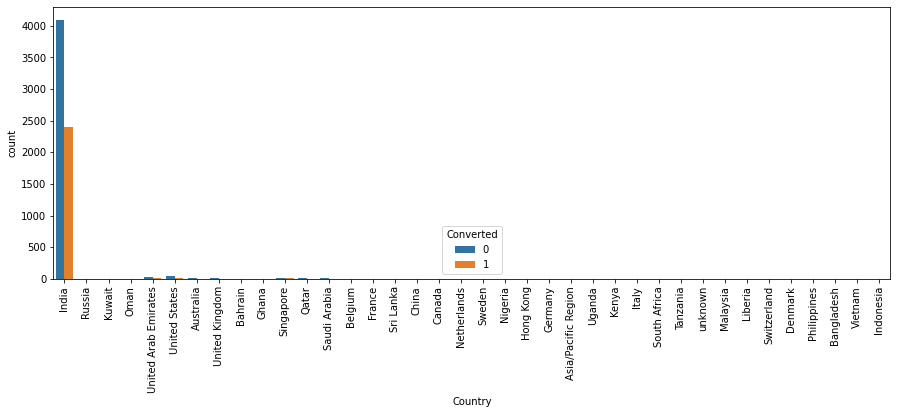

In [26]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
#s1=sns.countplot(leads.Country, hue=leads.Converted)
sns.countplot(leads.Country, hue=leads.Converted)
#s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.xticks(rotation=90)
plt.show()

**As we can see that country column has 95% of value as "India" and therefore has class imbalance. So , we can drop this column**

In [27]:
leads=leads.drop(['Country'],1)

In [28]:
#specialization 
#calculate the percentage of each  category. 
leads.Specialization.value_counts(dropna=False,normalize=True)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [29]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

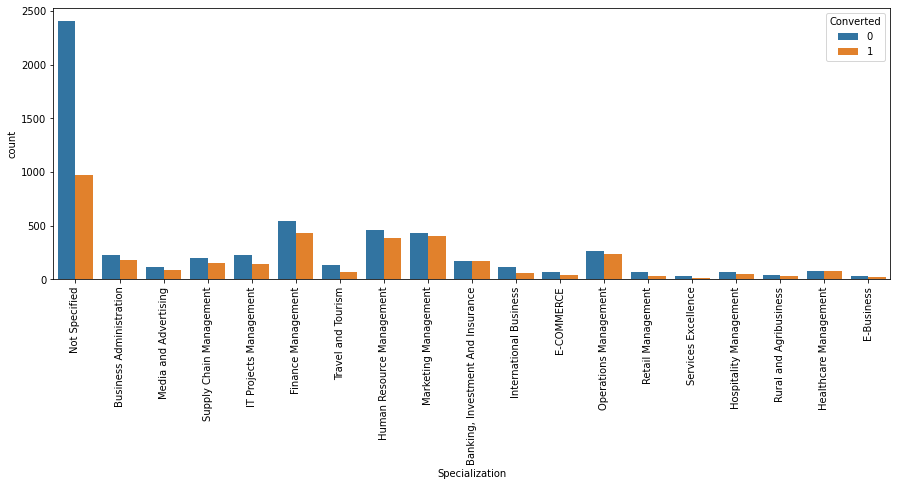

In [30]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We can combine management categories together.

In [31]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

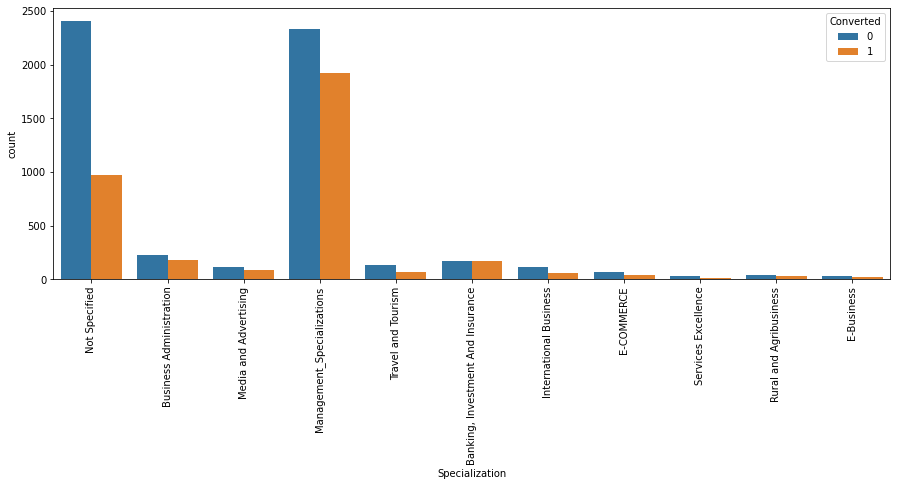

In [32]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**1.We can see that Management has highest number of leads as well as well as converted leads. This is a signicant column and we cannot drop it.**
**2.Business should focus more on customers of management specialization.**

In [33]:
#city
#calculate the percentage of each  category. 
leads.City.value_counts(dropna=False,normalize=True)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [34]:
# we can impute it with its mode
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

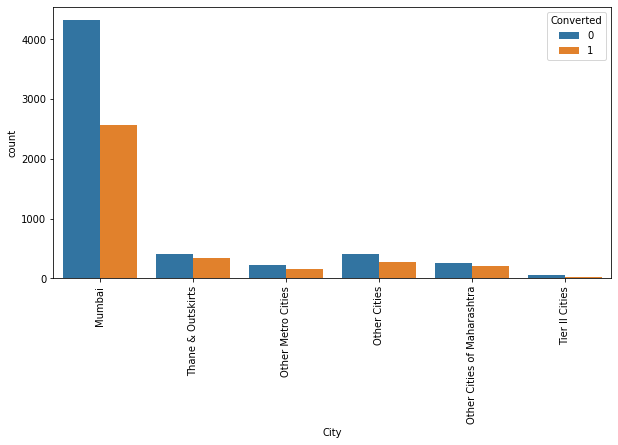

In [35]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**Mumbai has highest number of leads but thane and outskirts have higher percentage of converted leads.**

In [36]:
#tags
#calculate the percentage of each  category. 
leads.Tags.value_counts(dropna=False,normalize=True)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

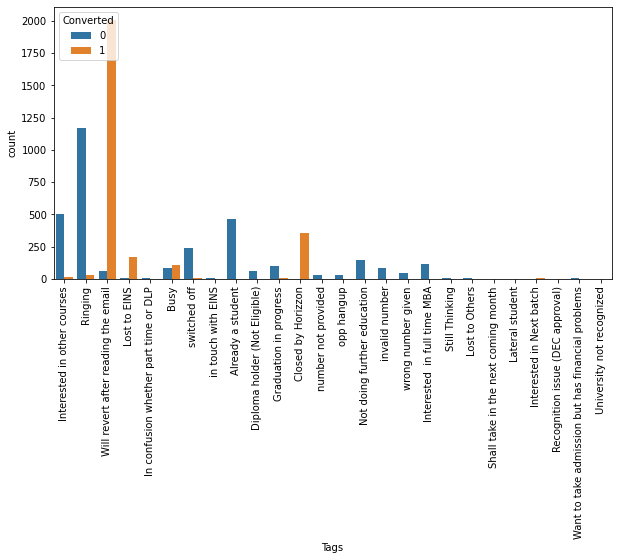

In [37]:
#plotting spread of Tag columnn before replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(leads.Tags, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**We can see that category "Will revert after reading the email" has highest percentage of converted leads.**

In [38]:
# we can impute it with not specified
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

In [39]:
# combining lower frequency values.
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads['Tags'] = leads['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

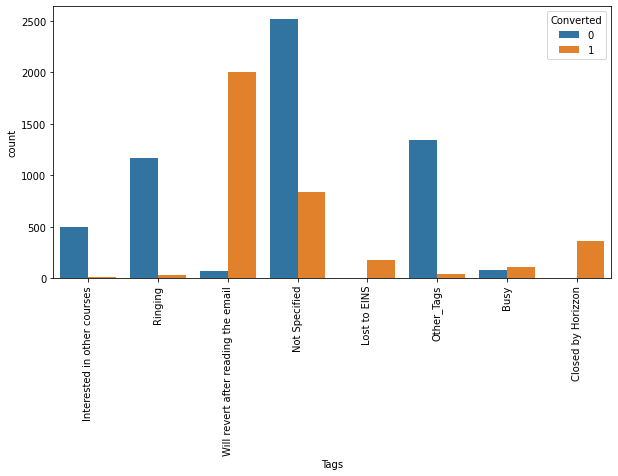

In [40]:
#plotting spread of tags columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(leads.Tags, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [41]:
#'What is your current occupation'
#calculate the percentage of each  category. 
leads['What is your current occupation'].value_counts(dropna=False,normalize=True)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [42]:
#imputing Nan values with mode "Unemployed"

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

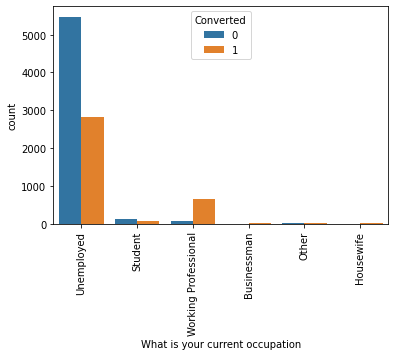

In [43]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**Even though number of leads are more of unmployed  customers but Working professional have higher percentage of converted leads. Business should focus on marketing to working professional as their target audience and should try to get more leads of this category.**


In [44]:
#calculate the percentage of each  category. 
leads['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

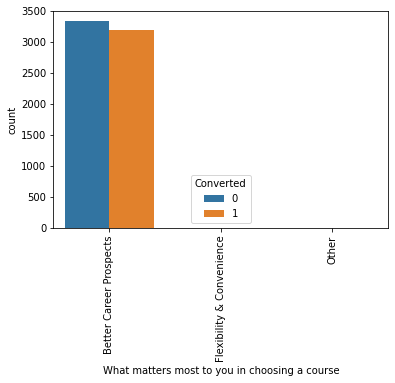

In [45]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**This column has high class imbalance. Therefore, We can drop this.**

In [46]:
leads=leads.drop(['What matters most to you in choosing a course'],1)

In [47]:
#Lead Origin
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

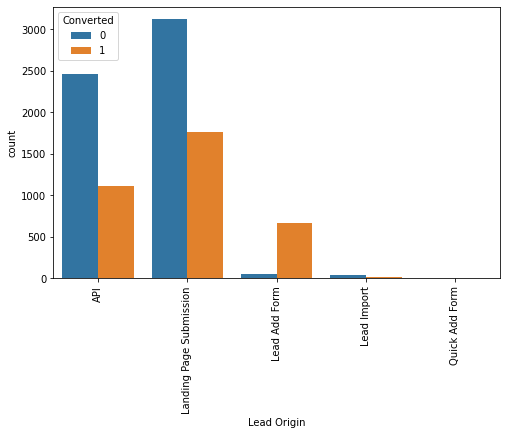

In [48]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**INFERENCE:**

**1. Lead Add Form has higher percentage of converted leads and therefore business should focus on generating more leads from this category.**

**2. API and Landing Page Submission get a lot of leads but their conversion rate is low. Business should focus on improving conversion rate of these categories.**

In [49]:
#Last Notable Activity
leads['Last Notable Activity'].value_counts(dropna=False,normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Form Submitted on Website       0.000108
Resubscribed to emails          0.000108
Email Received                  0.000108
View in browser link Clicked    0.000108
Name: Last Notable Activity, dtype: float64

In [50]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',                                             
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront',  
                                                                       'Email Received'],'Other_Notable_activity')

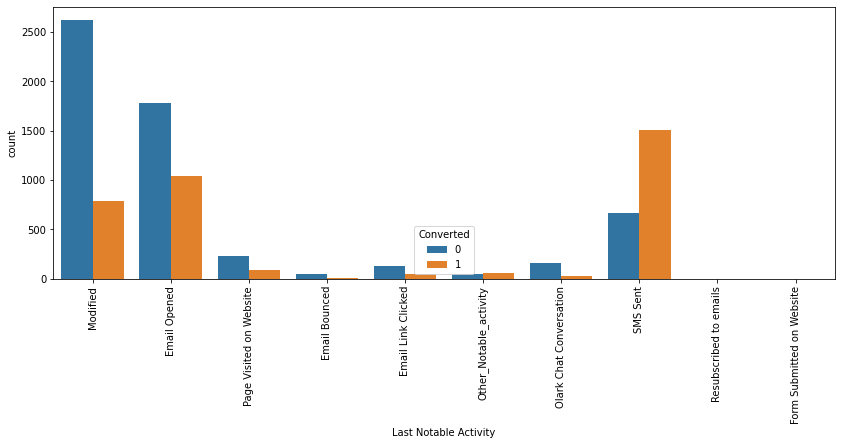

In [51]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [52]:
#checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                

In [53]:
#calculate the percentage of each  category. 
leads['Lead Source'].value_counts(dropna=False,normalize=True)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Social Media         0.000216
Press_Release        0.000216
Live Chat            0.000216
youtubechannel       0.000108
NC_EDM               0.000108
Pay per Click Ads    0.000108
blog                 0.000108
WeLearn              0.000108
welearnblog_Home     0.000108
testone              0.000108
Name: Lead Source, dtype: float64

In [54]:
#Drop the rows having null values 
leads = leads[~leads['Lead Source'].isnull()]

In [55]:
#cCombining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

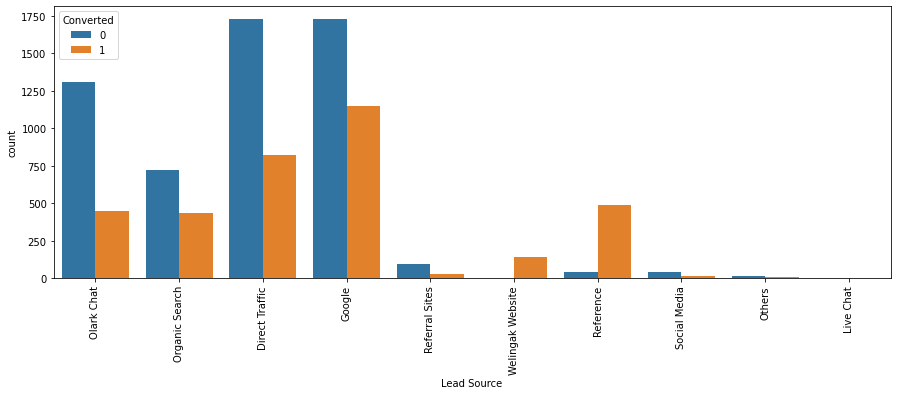

In [56]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**INFERENCE:**

**Goggle and direct traffic has high number of leads but conversion rate is low. 
Welingak Website and reference has higher converted leads but total number of leads is low.**

**Business should focus on improving conversion rate of leads from google and direct traffic. They should also try to get more leads from reference and welingak website.**

In [57]:
leads.shape

(9204, 27)

In [58]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False,normalize=True)

Email Opened                    0.372881
SMS Sent                        0.295850
Olark Chat Conversation         0.105715
Page Visited on Website         0.069535
Converted to Lead               0.046502
Email Bounced                   0.034876
Email Link Clicked              0.029009
Form Submitted on Website       0.012603
NaN                             0.010973
Unreachable                     0.010104
Unsubscribed                    0.006410
Had a Phone Conversation        0.003259
Approached upfront              0.000978
View in browser link Clicked    0.000652
Email Received                  0.000217
Email Marked Spam               0.000217
Resubscribed to emails          0.000109
Visited Booth in Tradeshow      0.000109
Name: Last Activity, dtype: float64

In [59]:
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

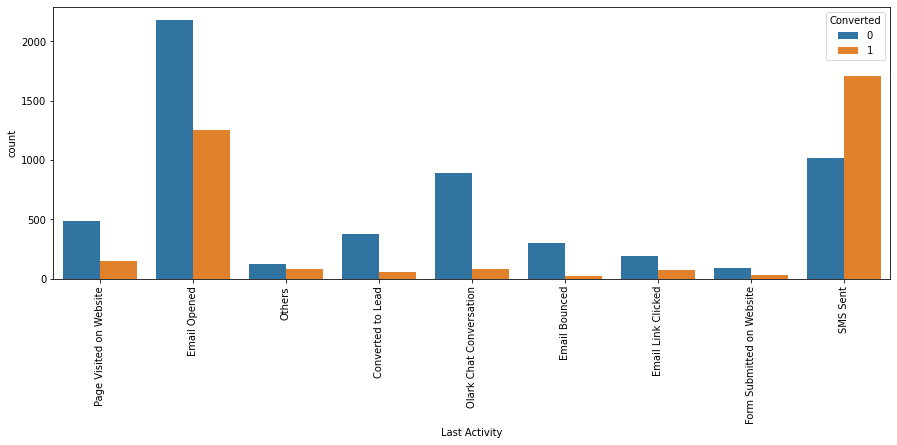

In [60]:
#plotting spread of Last Activity columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Last Activity'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

**INFERENCE:**

**Last Activity has very high correlation with Last Notable activity, We will analyze this further in the upcoming section**   . 

In [61]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()

In [62]:
leads.shape

(9074, 27)

In [63]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

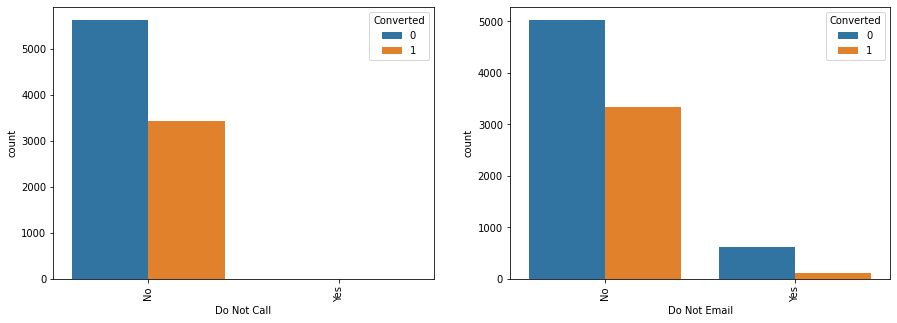

In [64]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [65]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False,normalize=True)

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

In [66]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

No     8358
Yes     716
Name: Do Not Email, dtype: int64

We can drop Do not call column as more than 90% of data is only one value

Checking other imbalanced variables

In [67]:
leads.Search.value_counts(dropna=False,normalize=True)

No     0.998457
Yes    0.001543
Name: Search, dtype: float64

In [68]:
leads.Magazine.value_counts(dropna=False,normalize=True)

No    1.0
Name: Magazine, dtype: float64

In [69]:
leads['Newspaper Article'].value_counts(dropna=False,normalize=True)

No     0.99978
Yes    0.00022
Name: Newspaper Article, dtype: float64

In [70]:
leads['X Education Forums'].value_counts(dropna=False,normalize=True)

No     0.99989
Yes    0.00011
Name: X Education Forums, dtype: float64

In [71]:
leads['Newspaper'].value_counts(dropna=False,normalize=True)

No     0.99989
Yes    0.00011
Name: Newspaper, dtype: float64

In [72]:
leads['Digital Advertisement'].value_counts(dropna=False,normalize=True)

No     0.999559
Yes    0.000441
Name: Digital Advertisement, dtype: float64

In [73]:
leads['Through Recommendations'].value_counts(dropna=False,normalize=True)

No     0.999229
Yes    0.000771
Name: Through Recommendations, dtype: float64

In [74]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False,normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [75]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False,normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [76]:
leads['Get updates on DM Content'].value_counts(dropna=False,normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [77]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False,normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [78]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False,normalize=True)

No     0.681728
Yes    0.318272
Name: A free copy of Mastering The Interview, dtype: float64

In [79]:
cols_drop=['Search','Do Not Call',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

In [80]:
leads.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [81]:
#list of columns to be dropped
cols_drop

['Search',
 'Do Not Call',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [82]:
#dropping columns
leads = leads.drop(cols_drop,1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  Tags                             9074 non-null   object 
 12  City                

In [83]:
leads.shape

(9074, 14)

### Numerical Attribute Analysis

In [84]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

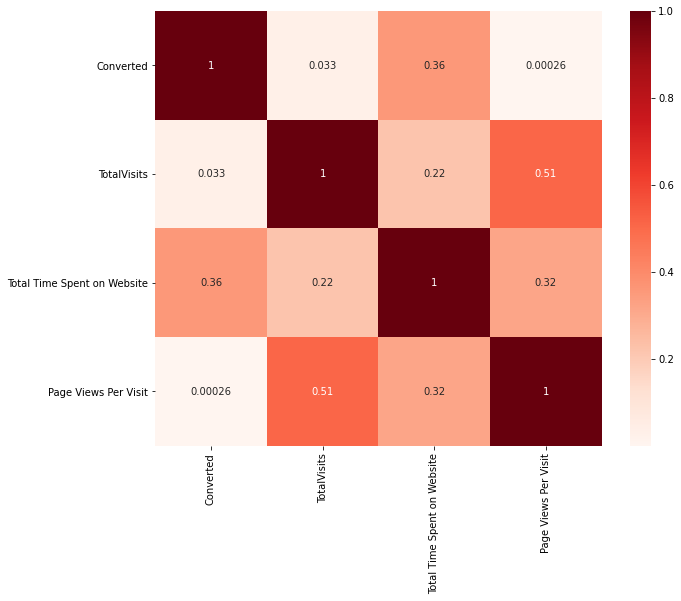

In [85]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="Reds", annot=True)
plt.show()

**Page Visits, TotalVisits and total time spent on website seem to be correlated. We can use this at the time of modelling with other parameters.**

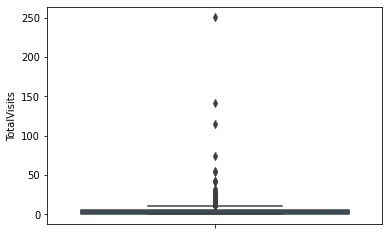

In [86]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [87]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

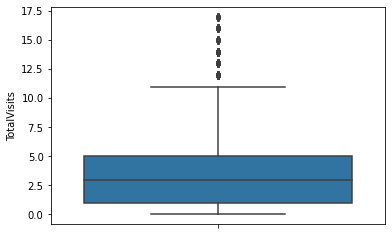

In [88]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [89]:
leads.shape

(8991, 14)

In [90]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8991.000000
mean      481.305973
std       544.883763
min         0.000000
5%          0.000000
25%         9.000000
50%       245.000000
75%       919.500000
90%      1372.000000
95%      1555.500000
99%      1837.200000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

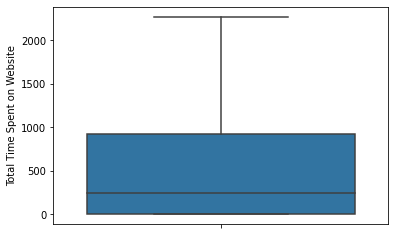

In [91]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

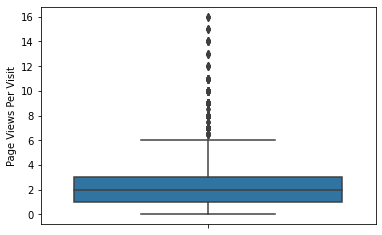

In [92]:
#visualizing spread of Page Views Per Visit numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [93]:
#checking percentiles for "Page Views Per Visit"

leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8991.000000
mean        2.344587
std         2.061548
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

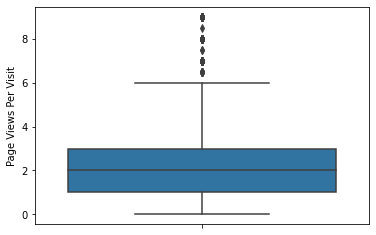

In [94]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [95]:
leads.shape

(8924, 14)

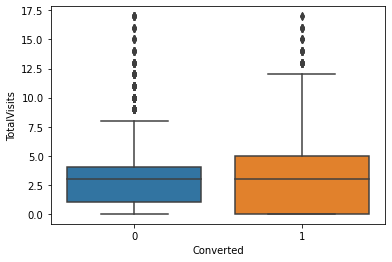

In [96]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

**Median of both converted and not converted categories are same so, we cannot infer much from ths column. But as TotalVisits is important attribute w.r.t business understanding and 75 percentile of converted category is more than that of not converted column, let us keep this column.**

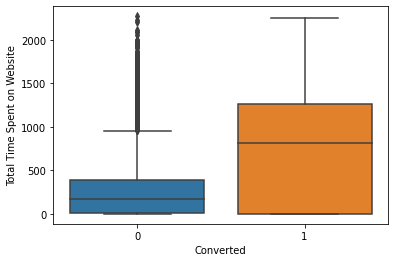

In [97]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

**INFERENCE:**

**1. We can clearly see that customers who spend more time on site have higher conversion rate. This can be because whoever is actually interested in enrolling into some course does there research and hence spends more time on the site. Thus the websites should be more engaging**

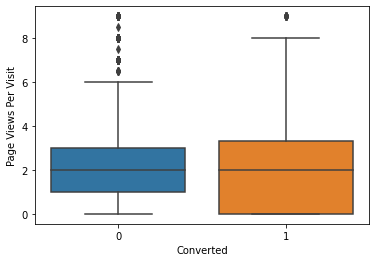

In [98]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

**As the medians are same for both the categories we cannot infer anything from this column.**

In [99]:
#checking missing values in leftover columns/

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                        0.0
Lead Origin                        0.0
Lead Source                        0.0
Do Not Email                       0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
Last Activity                      0.0
Specialization                     0.0
What is your current occupation    0.0
Tags                               0.0
City                               0.0
Last Notable Activity              0.0
dtype: float64

## Step2: Data Preparation

### Dummy Creation

In [100]:
#getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'Last Notable Activity'],
      dtype='object')

In [101]:
leads['Do Not Email'].value_counts()

No     8235
Yes     689
Name: Do Not Email, dtype: int64

In [102]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [103]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4768
API                        3546
Lead Add Form               580
Lead Import                  30
Name: Lead Origin, dtype: int64

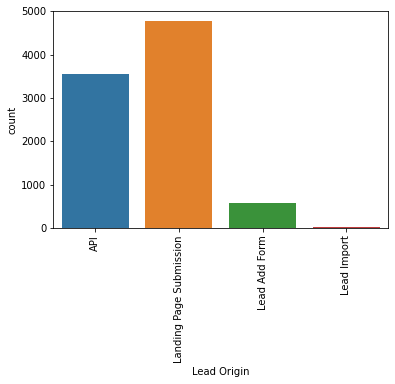

In [104]:
sns.countplot(leads['Lead Origin'])
plt.xticks(rotation=90)
plt.show()

In [105]:
leads['What is your current occupation'].value_counts()

Unemployed              8027
Working Professional     665
Student                  203
Other                     13
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

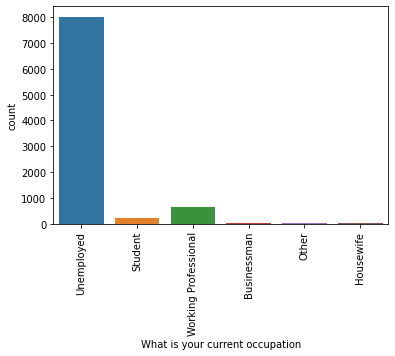

In [106]:
sns.countplot(leads['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [107]:
wwwww
leads = pd.concat([leads,dummy],1)

NameError: name 'wwwww' is not defined

In [108]:
leads['City'].value_counts()

Mumbai                         6660
Thane & Outskirts               722
Other Cities                    669
Other Cities of Maharashtra     437
Other Metro Cities              364
Tier II Cities                   72
Name: City, dtype: int64

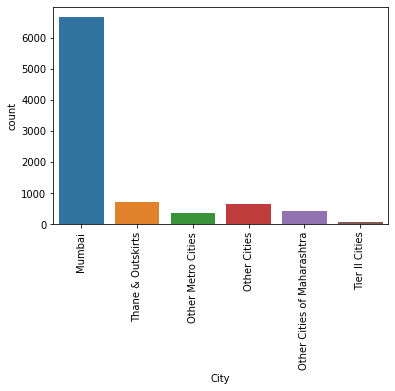

In [109]:
sns.countplot(leads['City'])
plt.xticks(rotation=90)
plt.show()

In [110]:
leads['Specialization'].value_counts()

Management_Specializations           4119
Not Specified                        3262
Business Administration               390
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
E-COMMERCE                            107
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

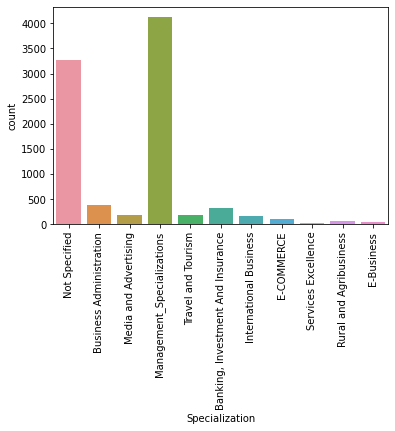

In [111]:
sns.countplot(leads['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [112]:
leads['Lead Source'].value_counts()

Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            442
Welingak Website     129
Referral Sites       117
Social Media          33
Others                18
Live Chat              2
Name: Lead Source, dtype: int64

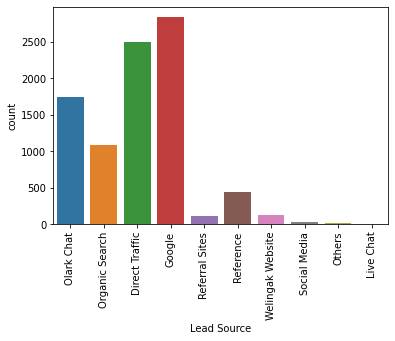

In [113]:
sns.countplot(leads['Lead Source'])
plt.xticks(rotation=90)
plt.show()

In [114]:
leads['Last Activity'].value_counts()

Email Opened                 3385
SMS Sent                     2678
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Others                        185
Form Submitted on Website     114
Name: Last Activity, dtype: int64

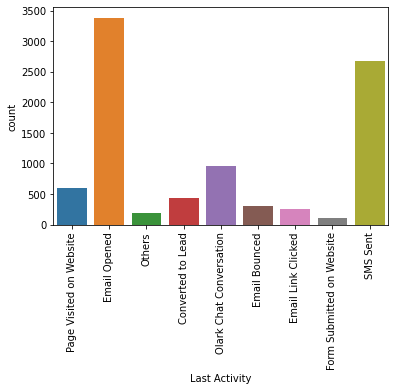

In [115]:
sns.countplot(leads['Last Activity'])
plt.xticks(rotation=90)
plt.show()

In [116]:
leads['Last Notable Activity'].value_counts()

Modified                     3221
Email Opened                 2785
SMS Sent                     2123
Page Visited on Website       288
Olark Chat Conversation       182
Email Link Clicked            170
Other_Notable_activity         94
Email Bounced                  59
Form Submitted on Website       1
Resubscribed to emails          1
Name: Last Notable Activity, dtype: int64

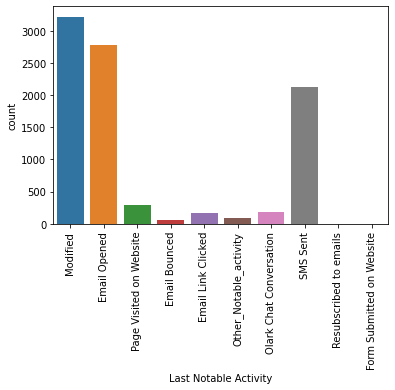

In [117]:
sns.countplot(leads['Last Notable Activity'])
plt.xticks(rotation=90)
plt.show()

In [118]:
leads['Tags'].value_counts()

Not Specified                          3278
Will revert after reading the email    1983
Other_Tags                             1357
Ringing                                1160
Interested in other courses             505
Closed by Horizzon                      290
Busy                                    183
Lost to EINS                            168
Name: Tags, dtype: int64

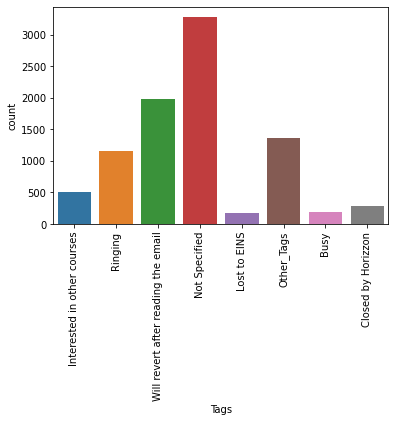

In [119]:
sns.countplot(leads['Tags'])
plt.xticks(rotation=90)
plt.show()

In [120]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads = pd.concat([leads, dummy], axis = 1)

dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [121]:
cat_cols=['Prospect ID', 'Lead Origin', 'Lead Source',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'Last Notable Activity']

In [122]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [123]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [124]:
leads.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_

### Train-Test Split :

In [125]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop(['Converted'], axis=1)

In [126]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [127]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6246 entries, 6676 to 5847
Data columns (total 47 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      6246 non-null   int64  
 1   TotalVisits                                       6246 non-null   float64
 2   Total Time Spent on Website                       6246 non-null   int64  
 3   Page Views Per Visit                              6246 non-null   float64
 4   Specialization_Banking, Investment And Insurance  6246 non-null   uint8  
 5   Specialization_Business Administration            6246 non-null   uint8  
 6   Specialization_E-Business                         6246 non-null   uint8  
 7   Specialization_E-COMMERCE                         6246 non-null   uint8  
 8   Specialization_International Business             6246 non-null   uint8  
 9   Specialization_M

### Feature Scaling:

In [128]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
6676,-0.285584,-0.049636,1.395668,0.395289,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6138,-0.285584,0.297929,0.609686,0.926758,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
8650,-0.285584,-0.049636,1.178657,0.395289,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3423,-0.285584,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6552,-0.285584,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step3: Logistic Regression Model Building 

In [129]:
import statsmodels.api as sm

In [130]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [131]:
rfe.support_

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True, False,  True, False,  True, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True, False, False, False, False,  True,  True,  True,  True,
        True,  True])

In [132]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 21),
 ('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('Specialization_Banking, Investment And Insurance', False, 20),
 ('Specialization_Business Administration', False, 29),
 ('Specialization_E-Business', False, 11),
 ('Specialization_E-COMMERCE', False, 25),
 ('Specialization_International Business', False, 12),
 ('Specialization_Management_Specializations', False, 19),
 ('Specialization_Media and Advertising', False, 30),
 ('Specialization_Rural and Agribusiness', False, 13),
 ('Specialization_Services Excellence', False, 15),
 ('Specialization_Travel and Tourism', False, 8),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Live Chat', False, 32),
 ('Lead Source_Olark Chat', False, 28),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 14),
 ('Lead

In [133]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [134]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked

##### Assessing the model with StatsModelsm

In [135]:
import statsmodels.api as sm

In [136]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()


Since P-value of all varibles look fine so let's check the VIF value to find if there is any collinearity.

In [137]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [138]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_Modified,1.49
6,Last Activity_SMS Sent,1.47
1,Lead Source_Direct Traffic,1.44
14,Tags_Will revert after reading the email,1.41
12,Tags_Other_Tags,1.28
13,Tags_Ringing,1.20
2,Lead Source_Organic Search,1.18
0,Total Time Spent on Website,1.15
10,Tags_Interested in other courses,1.13
5,Last Activity_Email Bounced,1.11


There is a high correlation between variables then we should drop the one with highest VIF.

In [139]:
#dropping variable with high VIF

col = col.drop('Last Notable Activity_SMS Sent',1)

KeyError: "['Last Notable Activity_SMS Sent'] not found in axis"

In [141]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1265.9
Date:                Sat, 29 Jan 2022   Deviance:                       2531.7
Time:                        21:26:02   Pearson chi2:                 8.67e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.9155      0.085    -10.749      0.000      -1.082      -0.749
Total Time Spent on Website                       0.8917      0.053     16.687      0.000       0.787       0.996
Lead Source_Direct Traffic                       -0.8298      0.132     -6.301      0.000      -1.088      -0.572
Lead Source_Organic Search                       -0.5486      0.168     -3.272      0.001      -0.877      -0.220
Lead Source_Referral Sites                       -0.8037      0.480     -1.675      0.094      -1.744       0.137
Lead Source_Welingak Website                      4.4497      0.742      5.998      0.000       2.996       5.904
Last Activity_Email Bounced                      -1.3667      0.562     -2.431      0.015      -2.468      -0.265
Last Activity_SMS Sent                            1.9575      0.114     17.213      0.000       1.735       2.180
Last Notable Activity_Modified                   -1.7106      0.127    -13.498      0.000      -1.959      -1.462
Last Notable Activity_Olark Chat Conversation    -1.6203      0.431     -3.757      0.000      -2.466      -0.775
Tags_Closed by Horizzon                           6.9383      0.724      9.577      0.000       5.518       8.358
Tags_Interested in other courses                 -2.0361      0.392     -5.193      0.000      -2.805      -1.268
Tags_Lost to EINS                                 5.6742      0.534     10.624      0.000       4.627       6.721
Tags_Other_Tags                                  -2.5156      0.222    -11.332      0.000      -2.951      -2.081
Tags_Ringing                                     -3.5425      0.247    -14.342      0.000      -4.027      -3.058
Tags_Will revert after reading the email          4.5336      0.185     24.544      0.000       4.172       4.896
=================================================================================================================
"""

In [142]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Notable Activity_Modified,1.49
6,Last Activity_SMS Sent,1.47
1,Lead Source_Direct Traffic,1.44
14,Tags_Will revert after reading the email,1.41
12,Tags_Other_Tags,1.28
13,Tags_Ringing,1.20
2,Lead Source_Organic Search,1.18
0,Total Time Spent on Website,1.15
10,Tags_Interested in other courses,1.13
5,Last Activity_Email Bounced,1.11


All the p-values and VIF seems fine , we can now proceed to make predictions.

In [143]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6676    0.982585
6138    0.997805
8650    0.978945
3423    0.032002
6552    0.154617
1696    0.227442
2110    0.993299
6830    0.390269
2581    0.006211
5927    0.168260
dtype: float64

In [144]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98258493, 0.99780477, 0.9789449 , 0.03200231, 0.15461729,
       0.22744151, 0.99329929, 0.39026929, 0.00621135, 0.16825966])

In [145]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.982585,6676
1,1,0.997805,6138
2,1,0.978945,8650
3,0,0.032002,3423
4,0,0.154617,6552


In [146]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.982585,6676,1
1,1,0.997805,6138,1
2,1,0.978945,8650,1
3,0,0.032002,3423,0
4,0,0.154617,6552,0


In [147]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3688  183]
 [ 275 2100]]


In [148]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9266730707652898


In [149]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [150]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8842105263157894

In [151]:
# Let us calculate specificity
TN / float(TN+FP)

0.9527253939550504

In [152]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.047274606044949624


In [153]:
# positive predictive value 
print (TP / float(TP+FP))

0.9198423127463863


In [154]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9306081251577089


### PLOTTING ROC CURVE

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [155]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

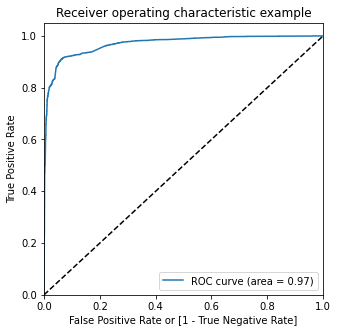

In [157]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

ROC curve is a good curve if it is close to 1 which means when it has high area under curve. Here the value is 0.97 so, this a very good model.

### Finding Optimal Cutoff Point

Above we used an arbitraty cut off 0.5 but we need to find an optimal threshold which balances sensitivity and specifity.

In [158]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.982585,6676,1,1,1,1,1,1,1,1,1,1,1
1,1,0.997805,6138,1,1,1,1,1,1,1,1,1,1,1
2,1,0.978945,8650,1,1,1,1,1,1,1,1,1,1,1
3,0,0.032002,3423,0,1,0,0,0,0,0,0,0,0,0
4,0,0.154617,6552,0,1,1,0,0,0,0,0,0,0,0


In [159]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.822606  0.973895  0.729786
0.2   0.2  0.896414  0.928000  0.877034
0.3   0.3  0.923631  0.916632  0.927926
0.4   0.4  0.927313  0.904421  0.941359
0.5   0.5  0.926673  0.884211  0.952725
0.6   0.6  0.914986  0.830737  0.966675
0.7   0.7  0.912584  0.805053  0.978559
0.8   0.8  0.903618  0.769263  0.986050
0.9   0.9  0.886167  0.717053  0.989925


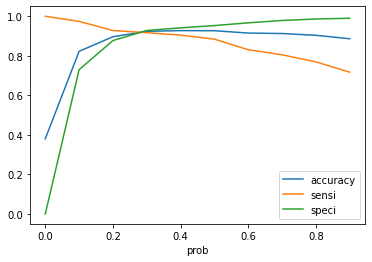

In [160]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [161]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.982585,6676,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.997805,6138,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.978945,8650,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.032002,3423,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.154617,6552,0,1,1,0,0,0,0,0,0,0,0,0


In [162]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9236311239193083

In [163]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3592,  279],
       [ 198, 2177]], dtype=int64)

In [164]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9166315789473685

In [166]:
# Let us calculate specificity
TN / float(TN+FP)

0.9279256006199949

**Result of model evaluation on Train data:**

Accuracy:92.2%

sensitivity: 91.41%

specificity: 92.68%

This seems to be a good model.

Let us look at some more evaluation metrics like:
    False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [167]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.07207439938000516


For a good model , we need to mnimize FPR. In our model FPR=7.31%, hence we can say it is a good model.

In [168]:
# Positive predictive value 
print (TP / float(TP+FP))

0.886400651465798


In [169]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9477572559366755


In [170]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3592,  279],
       [ 198, 2177]], dtype=int64)

In [171]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.886400651465798

In [172]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9166315789473685

In [173]:
from sklearn.metrics import precision_score, recall_score

In [174]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.886400651465798

In [175]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9166315789473685

In [176]:
from sklearn.metrics import precision_recall_curve

In [177]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

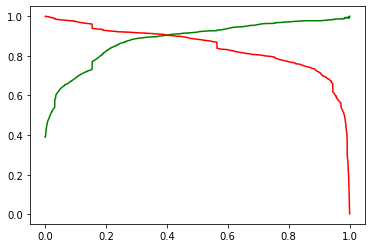

In [178]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [179]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7625,-0.285584,-0.397202,2.077703,-0.136180,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5207,-0.285584,0.297929,0.739164,0.926758,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2390,-0.285584,-1.092332,-0.878390,-1.199117,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4362,-0.285584,-0.397202,-0.455310,-0.136180,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1023,-0.285584,4.121147,-0.300302,1.458226,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [180]:
X_test=X_test[col]

In [181]:
X_test_sm = sm.add_constant(X_test)

In [182]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7625    0.082548
5207    0.969154
2390    0.991775
4362    0.051832
1023    0.017136
8226    0.992821
3079    0.244223
530     0.011388
7873    0.032002
5146    0.996774
dtype: float64

In [183]:
y_test_pred=y_test_pred.values.reshape(-1)

In [184]:
# Converting y_pred to a dataframe which is an array
y_pred_final = pd.DataFrame({'Converted':y_test.values,'Converted_prob':y_test_pred})
y_pred_final['Prospect ID'] = y_test.index

In [185]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.082548,7625
1,1,0.969154,5207
2,1,0.991775,2390
3,0,0.051832,4362
4,0,0.017136,1023


In [186]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,Converted_prob,Prospect ID,final_predicted
0,0,0.082548,7625,0
1,1,0.969154,5207,1
2,1,0.991775,2390,1
3,0,0.051832,4362,0
4,0,0.017136,1023,0


In [187]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.921209858103062

In [188]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1554,  130],
       [  81,  913]], dtype=int64)

In [189]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [190]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9185110663983903

In [191]:
# Let us calculate specificity
TN / float(TN+FP)

0.9228028503562945

In [192]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)


0.87535953978907

In [193]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9185110663983903

**Results of model evaluation on test data:**

Accuracy: 92.45 %

Sensitivity: 92.05%

Specifity: 92.69%

**Comparison between results of model evaluation of Train data and Test data:**

**Train Data:**

Accuracy:92.2%

sensitivity: 91.41%

specificity: 92.68%


**Test Data:**

Accuracy: 92.45 %

Sensitivity: 92.05%

Specifity: 92.69%

In our model sensitivity is an important metric as we want to make sure that we capture all the customers which can be hot leads and don't miss any such cosutomer.

Senstitvty: number of actual yes(s) correctly predicted / number of total yeses.
Sensitivity of our model: 91.41 %


**This Model seems to predict the Conversion rate very well.**